In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris

from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

from statsmodels.stats.outliers_influence import variance_inflation_factor #vif

import warnings
warnings.simplefilter('ignore')

In [32]:
# data4/프로야구.csv 를 이용하여 아래를 작성하시요.

# target: 2018년 연봉 
# 나머지:feature(선수명은 제거)

# 1) SGDRegress 모델의 r2 점수(train, test )를 출력하시요.

# 2) 
# heatmap을그리고
# 다중공선성 컬럼을 확인하고
# 다중공선성이 높은 컬럼을 제거후
# SGDRegress  모델의 r2 점수(train, test )를 출력하시요.

# 3) Lasso 모델을 이용하여 r2 점수(train, test )를 출력하시요.

# 5, 6, 7 번  은 문제를 만들어서 데이터를 분석하시요 ( 예를 들어 연봉이 가장높은 top 5 선수명 연봉등)


In [33]:
bb = pd.read_csv('./data4/프로야구.csv')

In [34]:
type(bb)

pandas.core.frame.DataFrame

In [35]:
bb = bb.drop(['선수명'], axis=1)

In [36]:
bb

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,SK,16,7,0,0,0,30,30,190.0,8.95,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,LG,11,11,1,0,0,30,29,185.1,7.43,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,KIA,20,6,0,0,0,31,31,193.1,7.36,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,LG,10,7,0,0,0,28,28,175.2,8.04,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,롯데,13,7,0,0,0,30,30,187.1,7.49,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,한화,2,5,0,0,2,33,5,62.2,4.31,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,KIA,3,2,0,0,0,25,11,59.1,4.85,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,롯데,0,2,0,0,0,9,2,14.2,4.91,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,삼성,0,3,0,1,0,41,0,43.2,7.63,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [37]:
x_data = bb.drop('연봉(2018)', axis=1)
y_data = bb.iloc[:, [-2]]

In [38]:
x_data

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,한화,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
148,KIA,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
149,롯데,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000
150,삼성,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900


In [39]:
y_data

,연봉(2018)
0,140000
1,120000
2,230000
3,100000
4,111000
...,...
147,7100
148,7500
149,10000
150,4000


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,random_state=1)
x_train=pd.get_dummies(x_train,columns=['팀명'])
x_test=pd.get_dummies(x_test,columns=['팀명'])


model=Pipeline([('scl',StandardScaler()), ('clf',SGDRegressor())])
model.fit(x_train, y_train)

Pipeline(steps=[('scl', StandardScaler()), ('clf', SGDRegressor())])

In [41]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9342888143466547
0.7644292657043881


In [42]:
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_train.values, i )  for i in range( x_train.shape[1] ) ]
vif['features'] = x_train.columns
vif

,VIF Factor,features
0,8.577012,승
1,6.722411,패
2,4.032262,세
3,4.101391,홀드
4,3.283049,블론
5,14.540301,경기
6,53.366758,선발
7,75.977394,이닝
8,108.213660,삼진/9
9,47.095125,볼넷/9


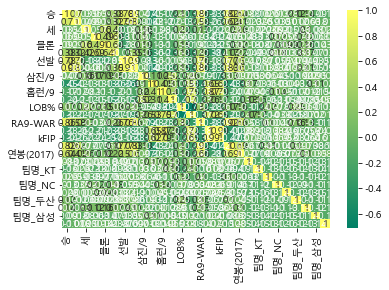

In [43]:
sns.heatmap(x_train.corr(),annot=True,cmap="summer")
plt.show()

In [44]:
x_remove = x_train.drop( ['ERA','경기', '선발', 'RA9-WAR', 'LOB%', 'BABIP', 'kFIP','이닝', '팀명_한화', 'FIP'] , axis=1)
x_remove

,승,패,세,홀드,블론,삼진/9,볼넷/9,홈런/9,WAR,연봉(2017),팀명_KIA,팀명_KT,팀명_LG,팀명_NC,팀명_SK,팀명_두산,팀명_롯데,팀명_삼성
19,1,3,37,0,5,9.00,1.60,1.02,1.82,70000,0,0,0,0,0,0,1,0
113,2,2,0,3,1,7.40,4.14,1.74,-0.06,2800,0,0,0,0,1,0,0,0
103,0,0,0,0,0,0.00,9.00,0.00,-0.01,2700,0,0,0,0,0,1,0,0
77,5,3,7,16,4,6.49,4.37,1.19,0.13,8000,0,0,0,0,1,0,0,0
145,2,0,0,0,0,7.11,6.25,2.56,-0.44,6200,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,7,4,11,6,6,7.39,5.27,1.12,-0.20,4700,1,0,0,0,0,0,0,0
137,3,1,0,2,1,3.71,2.70,1.69,-0.24,15000,0,0,0,0,0,0,1,0
72,0,2,0,0,0,6.35,4.76,0.00,0.18,3000,0,1,0,0,0,0,0,0
140,0,2,0,1,0,5.08,3.92,1.62,-0.28,6300,0,1,0,0,0,0,0,0


In [45]:
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_remove.values, i )  for i in range( x_remove.shape[1] ) ]
vif['features'] = x_remove.columns
vif

,VIF Factor,features
0,8.785904,승
1,4.443085,패
2,2.360514,세
3,2.327691,홀드
4,3.720477,블론
5,7.461101,삼진/9
6,5.989261,볼넷/9
7,3.633360,홈런/9
8,6.291328,WAR
9,3.474591,연봉(2017)


In [46]:
model=Pipeline([('scl',StandardScaler()), ('clf',SGDRegressor())])
model.fit(x_remove, y_train)

Pipeline(steps=[('scl', StandardScaler()), ('clf', SGDRegressor())])

In [47]:
x_test_r = x_test.drop(['ERA','경기', '선발', 'RA9-WAR', 'LOB%', 'BABIP', 'kFIP','이닝', '팀명_한화', 'FIP'] , axis=1)
print(model.score(x_remove, y_train))
print(model.score(x_test_r, y_test))

0.9316539683913589
0.760377733619759


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,random_state=1)
x_train=pd.get_dummies(x_train,columns=['팀명'])
x_test=pd.get_dummies(x_test,columns=['팀명'])
x_remove = x_train.drop( ['ERA','경기', '선발', 'RA9-WAR', 'LOB%', 'BABIP', 'kFIP','이닝', '팀명_한화', 'FIP'] , axis=1)
x_test_r = x_test.drop(['ERA','경기', '선발', 'RA9-WAR', 'LOB%', 'BABIP', 'kFIP','이닝', '팀명_한화', 'FIP'] , axis=1)
model_lasso = make_pipeline(StandardScaler(), Lasso())
model_lasso.fit(x_remove, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [56]:
print(model_lasso.score(x_remove, y_train))
print(model_lasso.score(x_test_r, y_test))

0.9317932155389275
0.7681995392951458


In [58]:
x_data

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,한화,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
148,KIA,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
149,롯데,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000
150,삼성,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900


In [65]:
# 4. 팀별 연봉(2018) 평균
grouped = bb['연봉(2018)'].groupby(bb['팀명'])

In [66]:
grouped.mean()

팀명
KIA    29440.000000
KT     10184.210526
LG     23444.444444
NC     11353.846154
SK     17255.555556
두산     17980.000000
롯데     26707.142857
삼성     14220.000000
한화     21720.000000
Name: 연봉(2018), dtype: float64

In [77]:
# 5. 연봉(2017) 에서 연봉(2018)로 가장 많이 인상된 선수 5명
bb = pd.read_csv('./data4/프로야구.csv')
bb['연봉상승률'] = bb['연봉(2018)'] / bb['연봉(2017)'] * 100

In [78]:
bb

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017),연봉상승률
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000,164.705882
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000,240.000000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000,153.333333
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000,100.000000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000,130.588235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100,87.654321
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100,241.935484
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000,62.500000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900,137.931034


In [79]:
bb.sort_values('연봉상승률', ascending=False).head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017),연봉상승률
12,임기영,KIA,8,6,0,0,0,23,19,118.1,...,0.331,72.3,3.65,4.25,4.07,4.19,2.79,13000,3100,419.354839
133,김윤동,KIA,7,4,11,6,6,65,1,80.1,...,0.267,75.0,4.59,1.89,5.54,5.53,-0.20,15000,4700,319.148936
13,박세웅,롯데,12,6,0,0,0,28,28,171.1,...,0.290,78.3,3.68,5.92,5.07,5.14,2.54,25000,10000,250.000000
5,피어밴드,KT,8,10,0,0,0,26,26,160.0,...,0.289,76.1,3.04,6.52,4.42,4.32,3.94,85000,35000,242.857143
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100,241.935484


In [80]:
# 6. 팀별 승,패 수
grouped = bb[['승', '패']].groupby(bb['팀명'])

In [81]:
grouped.sum()

,승,패
팀명,,
KIA,62,44
KT,41,65
LG,63,68
NC,38,32
SK,65,61
두산,60,37
롯데,68,48
삼성,44,58
한화,45,67


In [ ]:
# 4. 팀별 연봉(2018) 평균
# 5. 연봉(2017) 에서 연봉(2018)로 가장 많이 인상된 선수 5명
# 6. 팀별 승,패 수